# Подготовили студенты Пинкевич А., Яковлева С., Старченко К.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/sample_data/MatchTimelinesFirst15.csv')
df.head(15)

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0
5,5,3.494459e+09,1,25470.0,362.0,82.0,9.2,22856.0,319.0,86.0,8.8,9.0,1.0,0.0,0.0,7.0,1.0,0.0,0.0
6,6,3.463321e+09,1,25391.0,350.0,96.0,9.2,23236.0,345.0,80.0,8.6,8.0,2.0,0.0,0.0,5.0,1.0,0.0,1.0
7,7,3.463280e+09,0,28946.0,367.0,65.0,9.2,26528.0,311.0,63.0,8.8,15.0,2.0,0.0,1.0,14.0,1.0,0.0,1.0
8,8,3.462719e+09,1,26928.0,379.0,80.0,9.6,23065.0,362.0,95.0,9.2,11.0,1.0,0.0,0.0,5.0,2.0,0.0,1.0
9,9,3.462734e+09,1,26079.0,302.0,106.0,9.0,27275.0,347.0,91.0,9.4,9.0,1.0,0.0,1.0,10.0,2.0,0.0,1.0


In [ ]:
df = df.drop(['matchId','Unnamed: 0'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   blueAvgLevel             48651 non-null  float64
 5   redGold                  48651 non-null  float64
 6   redMinionsKilled         48651 non-null  float64
 7   redJungleMinionsKilled   48651 non-null  float64
 8   redAvgLevel              48651 non-null  float64
 9   blueChampKills           48651 non-null  float64
 10  blueHeraldKills          48651 non-null  float64
 11  blueDragonKills          48651 non-null  float64
 12  blueTowersDestroyed      48651 non-null  float64
 13  redChampKills            48651 non-null  float64
 14  redHeraldKills        

In [ ]:
df = df.drop(['redDragonKills','blueDragonKills','redAvgLevel','blueAvgLevel'], axis='columns')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   redGold                  48651 non-null  float64
 5   redMinionsKilled         48651 non-null  float64
 6   redJungleMinionsKilled   48651 non-null  float64
 7   blueChampKills           48651 non-null  float64
 8   blueHeraldKills          48651 non-null  float64
 9   blueTowersDestroyed      48651 non-null  float64
 10  redChampKills            48651 non-null  float64
 11  redHeraldKills           48651 non-null  float64
 12  redTowersDestroyed       48651 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.8 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


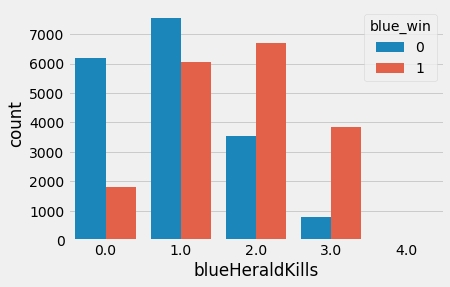

In [ ]:
X = df.drop('blue_win', axis = 1)
y = df['blue_win']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
sns.countplot(X_train['blueHeraldKills'], hue=y_train)
#тут распределние не очень, попробуем другой параметр

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


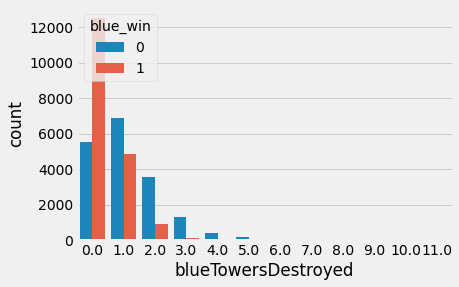

In [ ]:
X = df.drop('blue_win', axis = 1)
y = df['blue_win']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
sns.countplot(X_train['blueTowersDestroyed'], hue=y_train)
#тут уже все намного понятнее

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


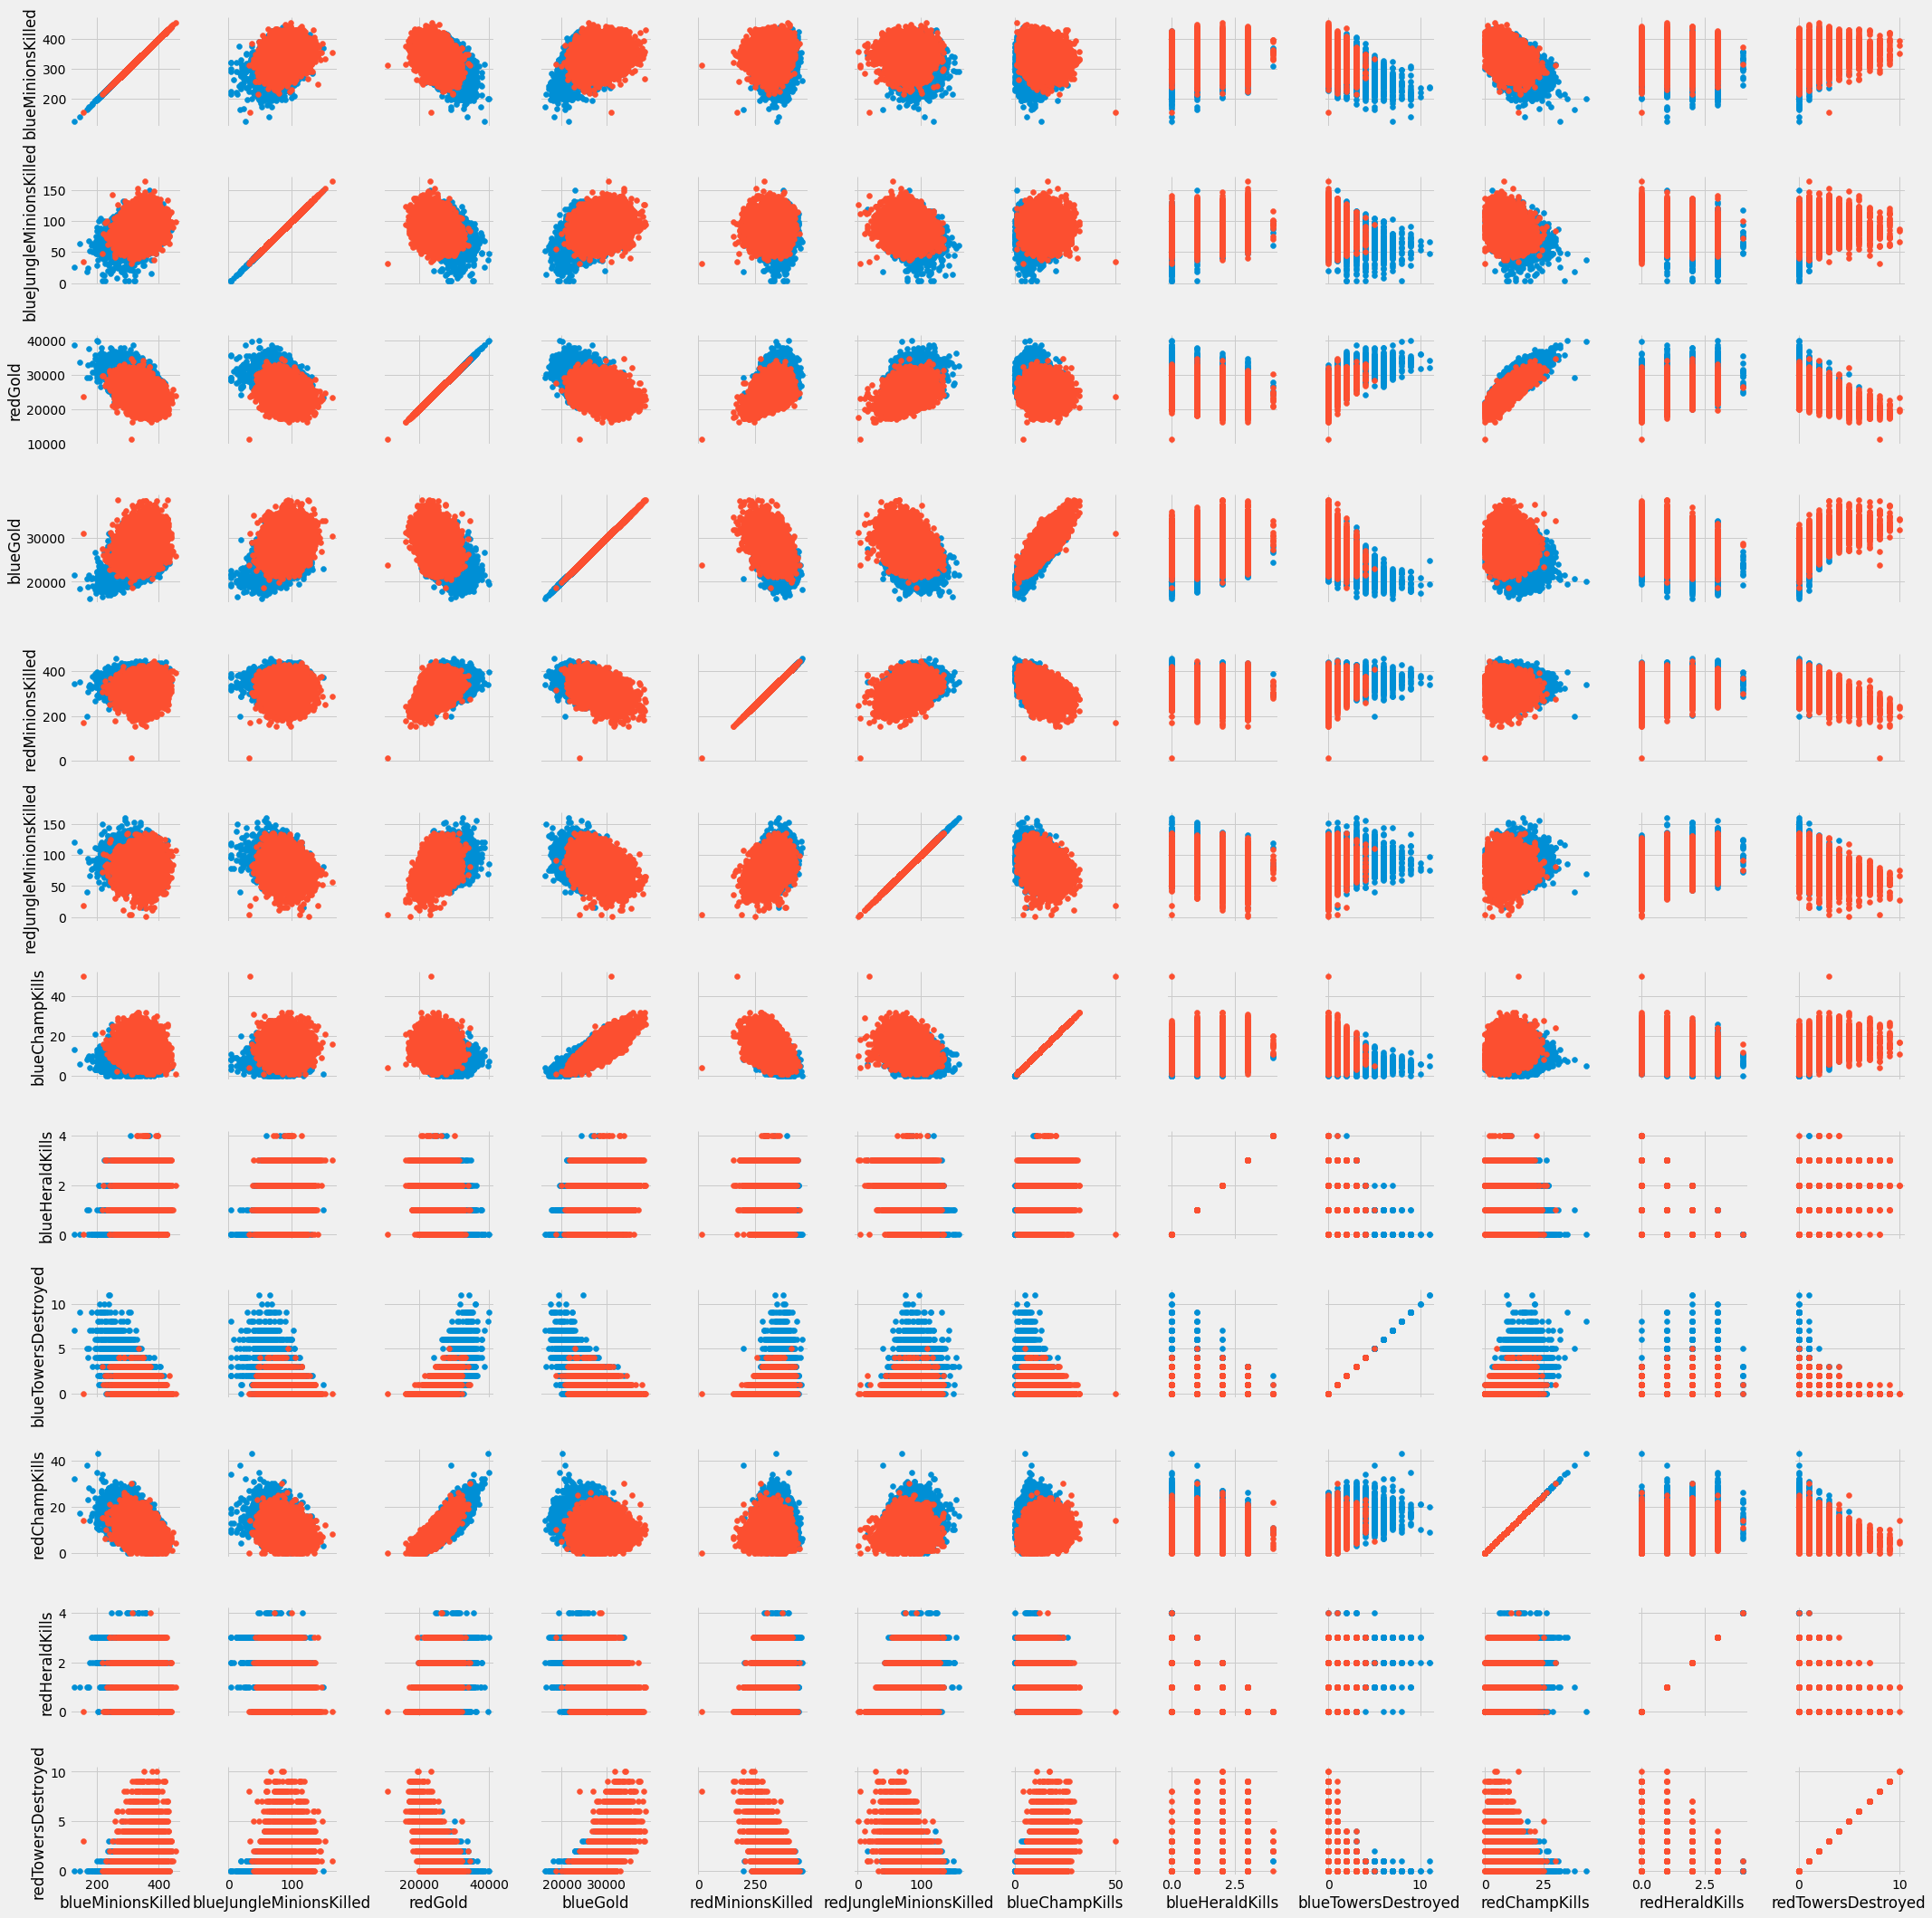

In [ ]:
#можем заметить, что наблюдается определенная зависимость, по которой можно точнее определять значение blue_win, теперь првоерим  все признаки относительно друг-друга
df_for_pairgrid = X_train[['blueMinionsKilled', 'blueJungleMinionsKilled', 'redGold','blueGold', 'redMinionsKilled', 'redJungleMinionsKilled', 'blueChampKills', 'blueHeraldKills','blueTowersDestroyed','redChampKills','redHeraldKills','redTowersDestroyed',]]
df_for_pairgrid['blue_win'] = y_train
sns.PairGrid(df_for_pairgrid, hue='blue_win').map(plt.scatter)

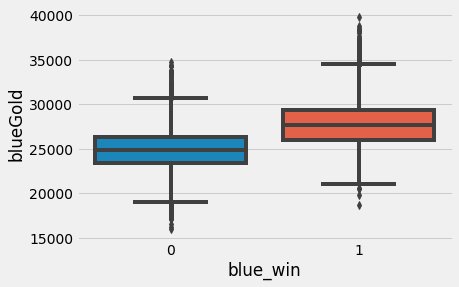

In [ ]:
#посмотрим плотность распределения некоторой величины
blueGold = pd.read_csv('/content/sample_data/MatchTimelinesFirst15.csv', sep=',')['blueGold'].apply(lambda x: x if x >= 0 else x / 5000)
sns.boxplot(x=y, y=blueGold)

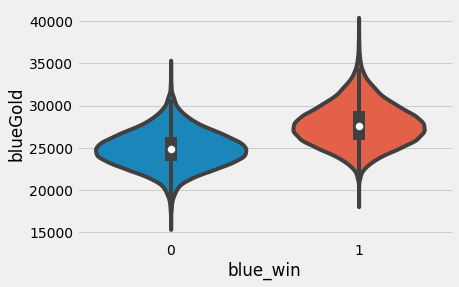

In [ ]:
sns.violinplot(x=y, y=blueGold)

Качество алгоритма до нормализации: 0.773904464359122
Качество алгоритма после нормализации: 0.778673024747184


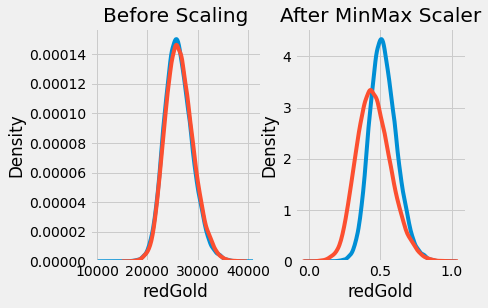

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=40).fit(X_train, y_train).score(X_test, y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=40).fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['redGold'], ax=ax1)
sns.kdeplot(X_train['blueGold'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['redGold'], ax=ax2)
sns.kdeplot(X_train_scaled['blueGold'], ax=ax2)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))

DecisionTreeClassifier 0.6982652306174464
SGDClassifier 0.7870591137055003
SVC 0.7842637507193949
GaussianNB 0.7753021458521746
KNeighborsClassifier 0.7514593439118639


Нам больше всего подошел SGDClassifier Стохастический градиентный спуск (SGD) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48651 entries, 0 to 48650
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blue_win                 48651 non-null  int64  
 1   blueGold                 48651 non-null  float64
 2   blueMinionsKilled        48651 non-null  float64
 3   blueJungleMinionsKilled  48651 non-null  float64
 4   redGold                  48651 non-null  float64
 5   redMinionsKilled         48651 non-null  float64
 6   redJungleMinionsKilled   48651 non-null  float64
 7   blueChampKills           48651 non-null  float64
 8   blueHeraldKills          48651 non-null  float64
 9   blueTowersDestroyed      48651 non-null  float64
 10  redChampKills            48651 non-null  float64
 11  redHeraldKills           48651 non-null  float64
 12  redTowersDestroyed       48651 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 4.8 MB


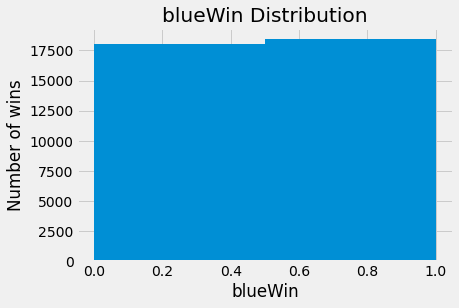

In [ ]:
#Стратификация
plt.style.use('fivethirtyeight')
plt.hist(y_train, bins=2);
plt.xlabel('blueWin'); plt.ylabel('Number of wins');
plt.title('blueWin Distribution');

In [ ]:
from sklearn.metrics import accuracy_score

a = np.ones(y_test.shape[0])
accuracy_score(y_test, a)

0.5053851845761737

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(y_test, a))
print('Precision:', precision_score(y_test, a))
print('Recall:', recall_score(y_test, a))
print('ROC AUC:', roc_auc_score(y_test, a))
pr, rec, _ = precision_recall_curve(y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(y_test, a))
print('F0.5:', fbeta_score(y_test, a, 0.5))
print('F2:', fbeta_score(y_test, a, 2))

Accuracy: 0.5053851845761737
Precision: 0.5053851845761737
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.7526925922880868
F1: 0.6714363735663572
F0.5: 0.5608678990492527
F2: 0.8363037740469647
